안녕하세요 투빅스 23기 서동혁입니다.

아래는 **1주차 2교시 EDA과제**입니다.

타이타닉 데이터를 활용하여 EDA, 시각화 실습과 예측모델 최적화를 진행해보려고 합니다.

EDA와 시각화 실습은 발표에서 보신 것과 같이 차근차근 진행해주시면 됩니다.

(물음표 부분을 채워서 실행해주세요!)

예측 모델 최적화는 RandomForest 알고리즘을 피처 엔지니어링을 통해서 개선해보는 실습으로 진행하려고 합니다.

너무 어렵지 않게 진행해보려고 하니 차근차근 EDA부터 모델 구성까지의 흐름을 가져가 보시면 좋을 것 같습니다.

과제를 진행하며 행여나 모르시는 부분이나 이 사람이 왜 이런 문제를 냈을까 하는 궁금증이 생기신 분들은 언제든 연락주시면 열심히 대답해드리겠습니다.

감사합니다.

## EDA

In [14]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [18]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
titanic.describe(include='all') #--> unique, top, freq추가됨

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [24]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_37716\3290119062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [26]:
#열의 각 값에 대한 횟수 반환
titanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [28]:
# fillna => 결측값을 원하는 값으로 변경하는 메서드
titanic['deck'].fillna('C', inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_37716\2211871595.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['deck'].fillna('C', inplace=True)


In [30]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

**문제 1**

**Q1) 생존자 비율?**

In [32]:
# value_counts => 각 value에 대한 횟수 반환
titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

**Q1) 탑승자 중 남여 비율?**

In [34]:
titanic['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

**Q2) 탑승자 중 남자가 많이 생존했을까? 여자가 많이 생존했을까??**

In [37]:
titanic.groupby('sex')['survived'].value_counts() #0이면 사망, 1이면 생존

sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [39]:
titanic.groupby('survived')['sex'].value_counts()

survived  sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

In [41]:
import seaborn as sns

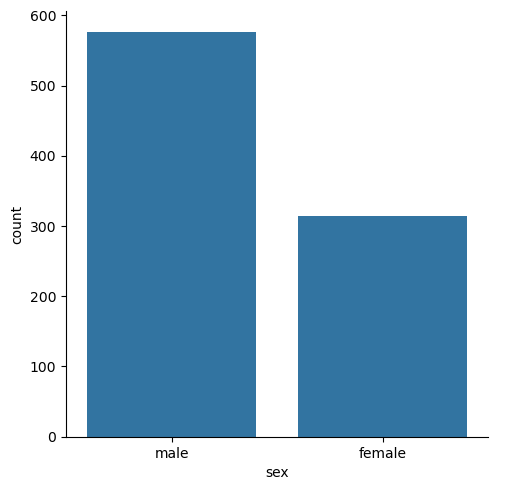

In [43]:
sns.catplot(data=titanic, x="sex", kind='count')

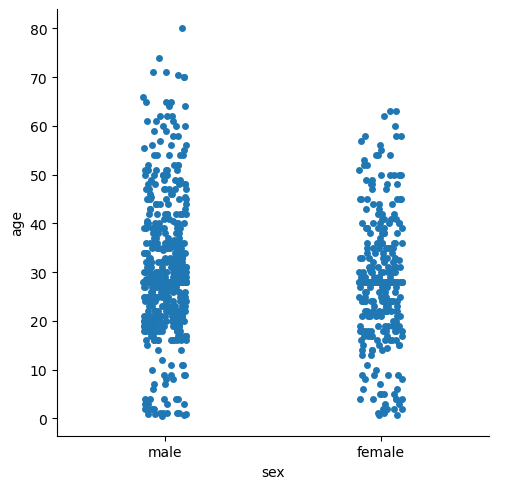

In [45]:
titanic

sns.catplot(data=titanic, x="sex", y='age')

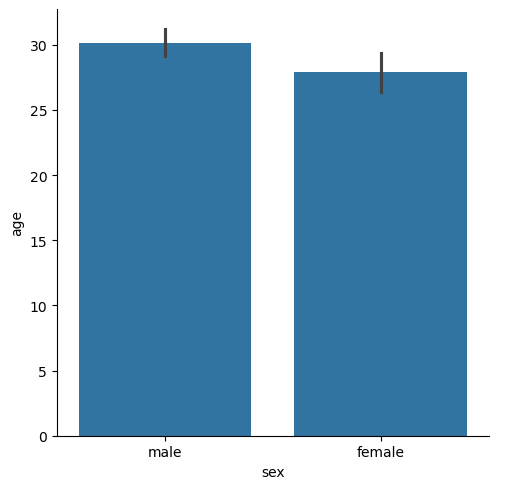

In [47]:
sns.catplot(data=titanic, x="sex", y='age', kind='bar')

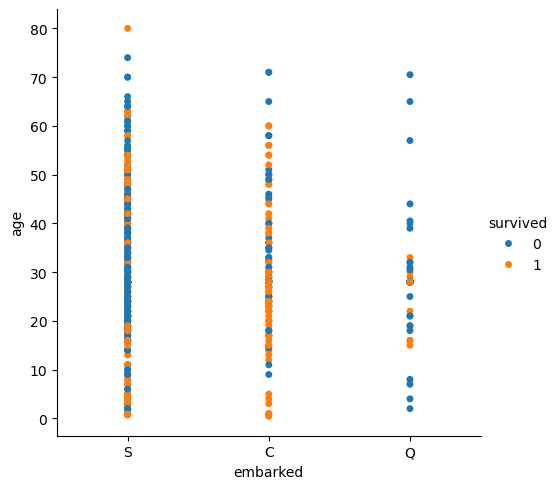

In [49]:
sns.catplot(data=titanic, x="embarked", y="age", hue='survived', jitter=False)

C:\Users\kyung\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kyung\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kyung\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 37.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kyung\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kyung\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.7% of the points

C:\Users\kyung\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 41.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


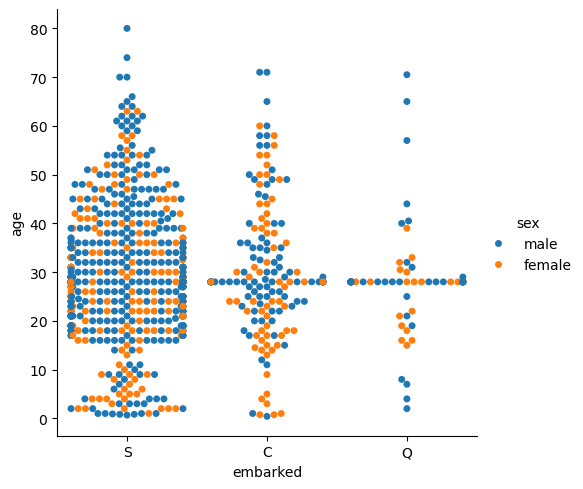

In [51]:
sns.catplot(data=titanic, x="embarked", y="age", hue='sex', kind='swarm')

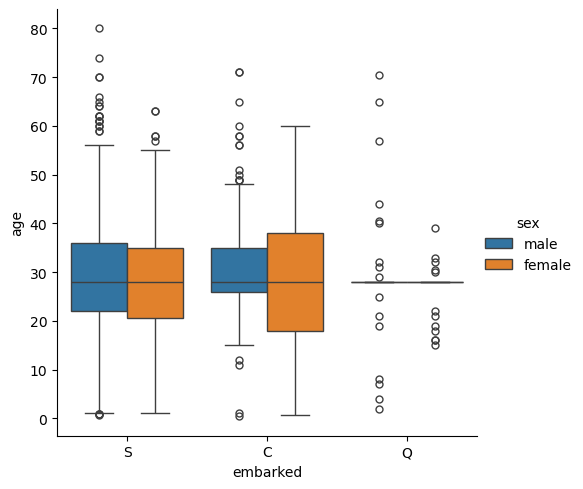

In [52]:
sns.catplot(data=titanic, x="embarked", y="age", hue='sex', kind='box')

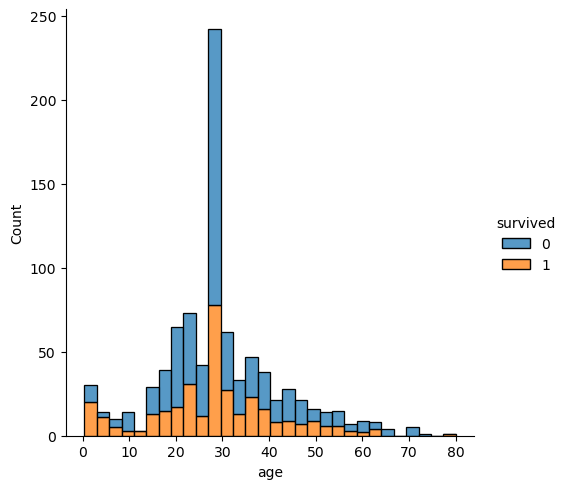

In [53]:
sns.displot(data=titanic, x='age', hue='survived', multiple="stack") #multiple="stack"

In [57]:
#상관분석 -	survived-pclass	/ age-sibsp	등의 관계를 보는 것! heatmap

In [59]:
titanic.replace({'female':0, 'male':1}, inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_37716\1660004077.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace({'female':0, 'male':1}, inplace=True)


In [61]:
c_df = titanic.select_dtypes(include='number').corr() #corr()메소드를 써줘라! -> 상관계수 계산해줌
c_df

,survived,pclass,sex,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500
sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333
age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688
sibsp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000


<Axes: >

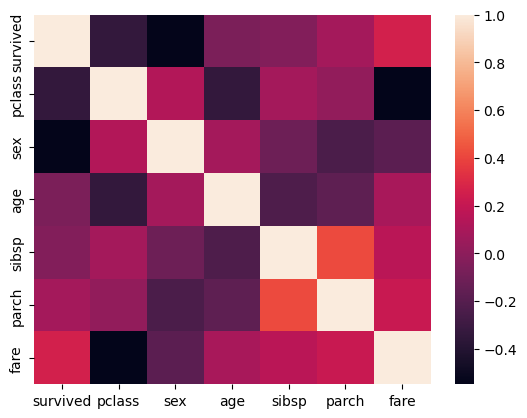

In [63]:
sns.heatmap(data=c_df)

<Axes: >

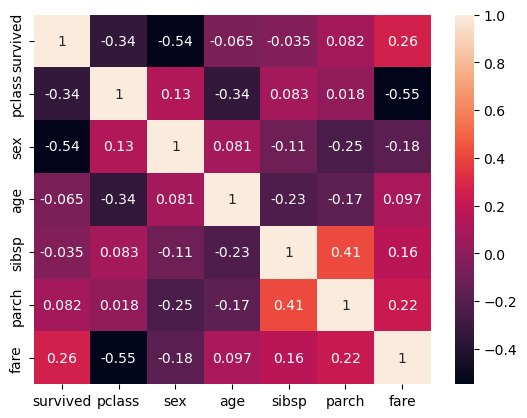

In [65]:
sns.heatmap(data=c_df, annot=True)

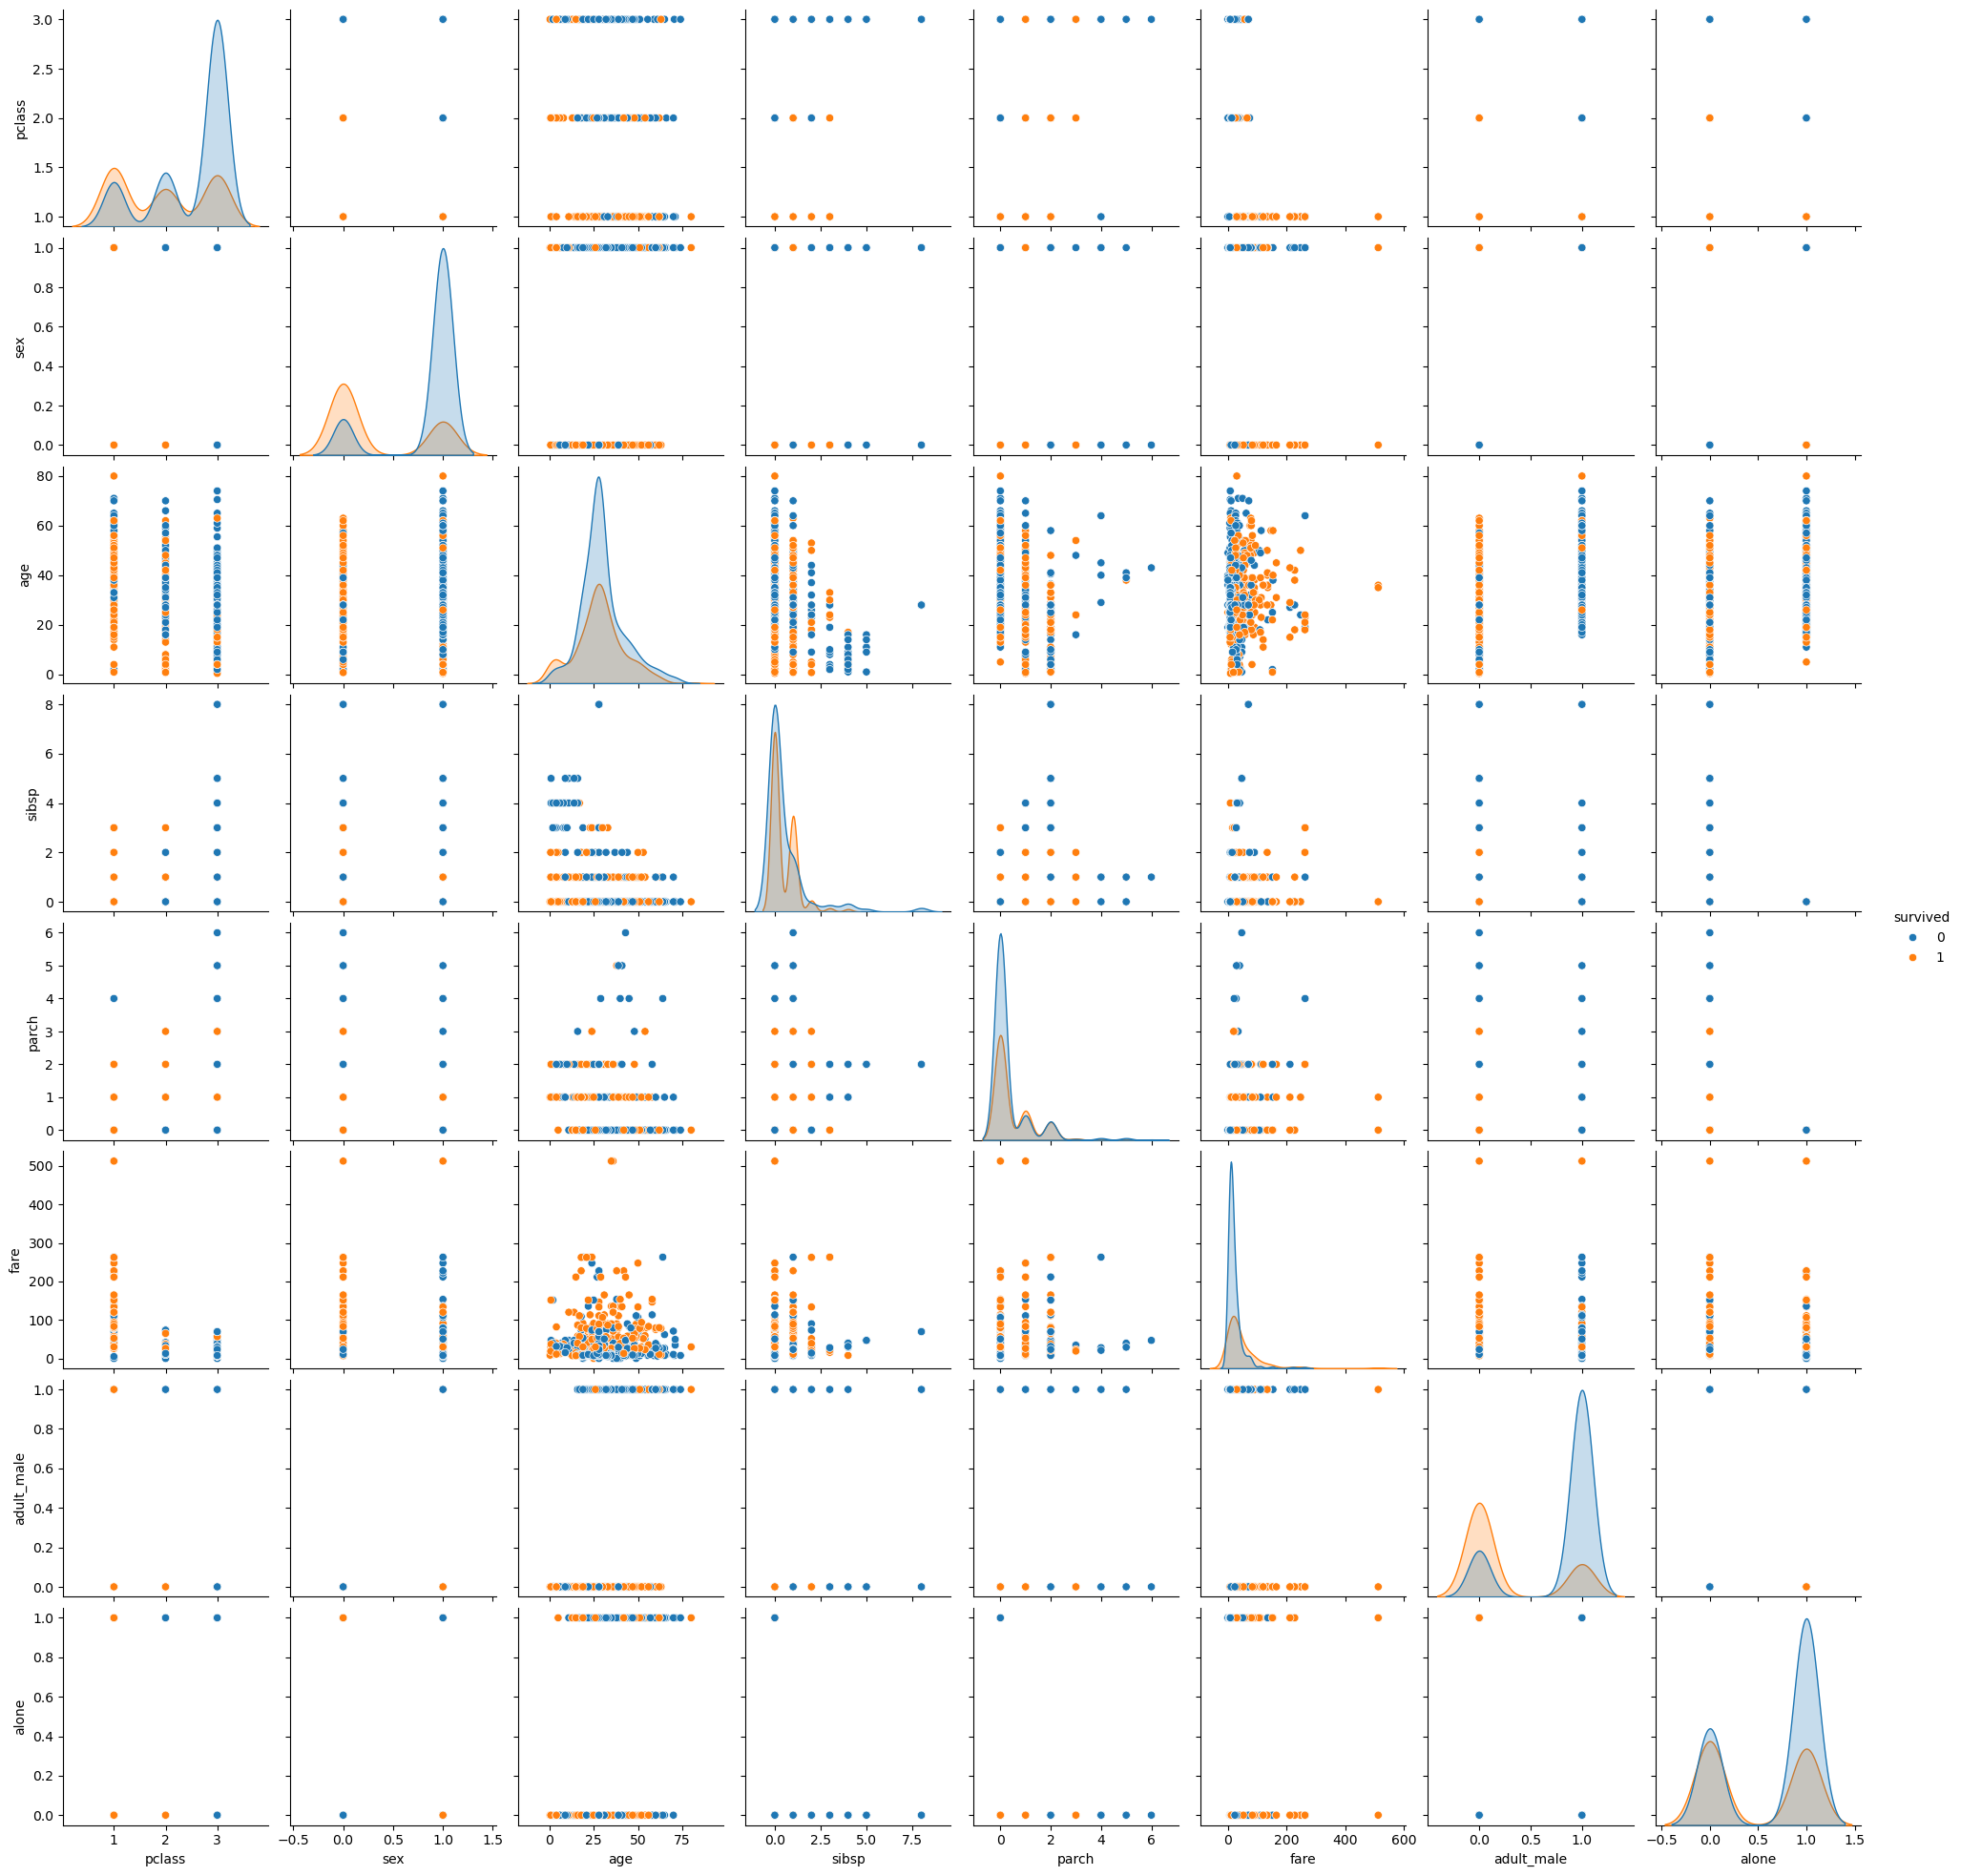

In [66]:
sns.pairplot(data=titanic, hue='survived')

# Random Forest 모델을 사용한 생존자 예측

이제 Random Forest 모델을 사용하여 생존자를 예측해보겠습니다.

차근차근 따라와 주세요!

## RandomForest Base Model

In [70]:
# 필요한 라이브러리 import
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np


In [71]:
# 데이터 전처리 - 범주형 변수를 숫자로 변환
# 데이터 복사본 생성
titanic_model = titanic.copy()

# embarked 열의 결측값 처리
titanic_model['embarked'].fillna('S', inplace=True)

# 범주형 변수 인코딩
label_encoder = LabelEncoder()

# embarked 인코딩
titanic_model['embarked'] = label_encoder.fit_transform(titanic_model['embarked'])

# deck 인코딩
titanic_model['deck'] = label_encoder.fit_transform(titanic_model['deck'])

# class 인코딩
titanic_model['class'] = label_encoder.fit_transform(titanic_model['class'])

# who 인코딩
titanic_model['who'] = label_encoder.fit_transform(titanic_model['who'])

# embark_town 인코딩
titanic_model['embark_town'] = label_encoder.fit_transform(titanic_model['embark_town'])

# alive 인코딩
titanic_model['alive'] = label_encoder.fit_transform(titanic_model['alive'])

# Boolean 변수를 숫자로 변환
titanic_model['adult_male'] = titanic_model['adult_male'].astype(int)
titanic_model['alone'] = titanic_model['alone'].astype(int)

print("데이터 전처리 완료!")
print("데이터 타입 확인:")
print(titanic_model.dtypes)


데이터 전처리 완료!
데이터 타입 확인:
survived         int64
pclass           int64
sex              int64
age            float64
sibsp            int64
parch            int64
fare           float64
embarked         int32
class            int32
who              int32
adult_male       int32
deck             int32
embark_town      int32
alive            int32
alone            int32
dtype: object


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_37716\3995791989.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_model['embarked'].fillna('S', inplace=True)


In [72]:
# 특성과 타겟 분리
# 타겟 변수 (예측하려는 변수)
y = titanic_model['survived']

# 특성 변수 (예측에 사용할 변수들)
# 'survived'와 'alive'는 제외 (alive는 survived와 동일한 정보)
X = titanic_model.drop(['survived', 'alive'], axis=1)

print("특성 변수 목록:")
print(X.columns.tolist())
print(f"\n데이터 형태: X = {X.shape}, y = {y.shape}")

# 훈련/테스트 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n훈련 데이터: {X_train.shape}")
print(f"테스트 데이터: {X_test.shape}")


특성 변수 목록:
['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alone']

데이터 형태: X = (891, 13), y = (891,)

훈련 데이터: (712, 13)
테스트 데이터: (179, 13)


In [73]:
# Random Forest 모델 생성 및 학습
# n_estimators: 트리의 개수
# random_state: 재현 가능한 결과를 위한 시드값
# max_depth: 트리의 최대 깊이
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

# 모델 학습
print("Random Forest 모델 학습 중...")
rf_model.fit(X_train, y_train)
print("모델 학습 완료!")

# 예측 수행
y_pred = rf_model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"\n모델 정확도: {accuracy:.4f} ({accuracy*100:.2f}%)")


Random Forest 모델 학습 중...
모델 학습 완료!

모델 정확도: 0.8268 (82.68%)


In [79]:
# 상세한 성능 평가
print("=== 분류 성능 리포트 ===")
print(classification_report(y_test, y_pred, target_names=['사망', '생존']))

print("\n=== 혼동 행렬 ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n=== 혼동 행렬 해석 ===")
print(f"실제 사망 - 예측 사망: {cm[0][0]}명")
print(f"실제 사망 - 예측 생존: {cm[0][1]}명")
print(f"실제 생존 - 예측 사망: {cm[1][0]}명")
print(f"실제 생존 - 예측 생존: {cm[1][1]}명")


=== 분류 성능 리포트 ===
              precision    recall  f1-score   support

          사망       0.82      0.90      0.86       105
          생존       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179


=== 혼동 행렬 ===
[[94 11]
 [20 54]]

=== 혼동 행렬 해석 ===
실제 사망 - 예측 사망: 94명
실제 사망 - 예측 생존: 11명
실제 생존 - 예측 사망: 20명
실제 생존 - 예측 생존: 54명


=== 특성 중요도 ===
        feature  importance
5          fare    0.181694
2           age    0.155016
9    adult_male    0.150373
1           sex    0.113953
8           who    0.109114
0        pclass    0.061269
7         class    0.057127
3         sibsp    0.046132
10         deck    0.042377
4         parch    0.027712
6      embarked    0.021555
11  embark_town    0.020083
12        alone    0.013595


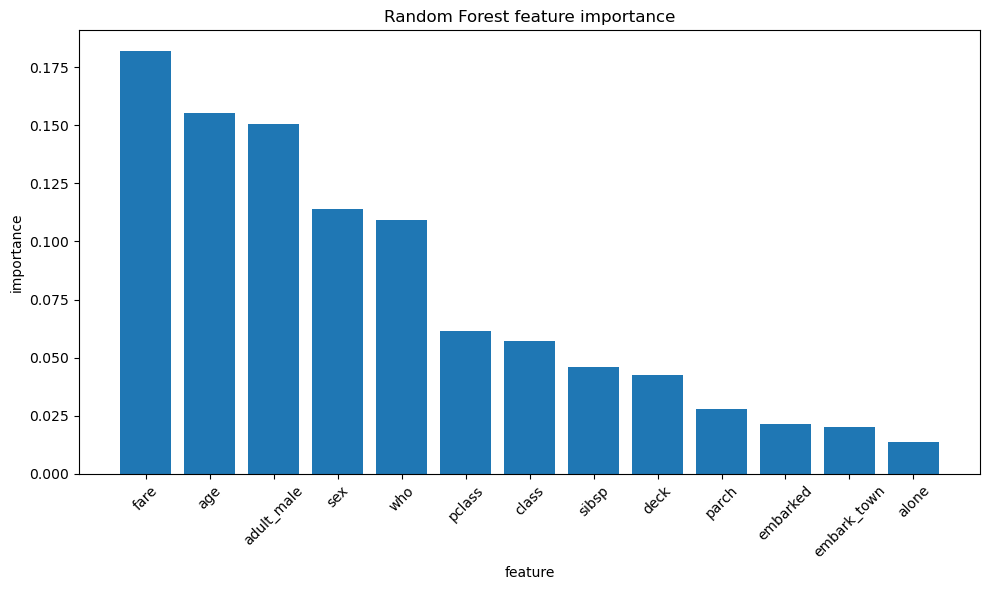

In [81]:
# 특성 중요도 분석 및 시각화
import matplotlib.pyplot as plt

# 특성 중요도 가져오기
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# 특성 중요도를 데이터프레임으로 만들기
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("=== 특성 중요도 ===")
print(importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.title('Random Forest feature importance')
plt.xlabel('feature')
plt.ylabel('importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [83]:
# 예측 예시
# 테스트 데이터에서 몇 개 샘플 선택하여 예측 결과 확인, 간단한 예시입니다. 한번 확인해보셔요.
sample_indices = [0, 1, 2, 3, 4]
sample_X = X_test.iloc[sample_indices]
sample_y_true = y_test.iloc[sample_indices]
sample_y_pred = rf_model.predict(sample_X)

print("=== 예측 예시 ===")
for i, idx in enumerate(sample_indices):
    actual = "생존" if sample_y_true.iloc[i] == 1 else "사망"
    predicted = "생존" if sample_y_pred[i] == 1 else "사망"
    result = "✓" if sample_y_true.iloc[i] == sample_y_pred[i] else "✗"
    
    print(f"승객 {idx+1}: 실제 {actual} → 예측 {predicted} {result}")

# 예측 확률도 확인
print("\n=== 예측 확률 ===")
sample_proba = rf_model.predict_proba(sample_X)
for i, idx in enumerate(sample_indices):
    death_prob = sample_proba[i][0] * 100
    survival_prob = sample_proba[i][1] * 100
    print(f"승객 {idx+1}: 사망 확률 {death_prob:.1f}%, 생존 확률 {survival_prob:.1f}%")


=== 예측 예시 ===
승객 1: 실제 생존 → 예측 사망 ✗
승객 2: 실제 사망 → 예측 사망 ✓
승객 3: 실제 사망 → 예측 사망 ✓
승객 4: 실제 생존 → 예측 생존 ✓
승객 5: 실제 생존 → 예측 사망 ✗

=== 예측 확률 ===
승객 1: 사망 확률 71.8%, 생존 확률 28.2%
승객 2: 사망 확률 94.8%, 생존 확률 5.2%
승객 3: 사망 확률 89.1%, 생존 확률 10.9%
승객 4: 사망 확률 2.0%, 생존 확률 98.0%
승객 5: 사망 확률 58.5%, 생존 확률 41.5%


모델 요약

Random Forest 모델 특징:
- **알고리즘**: Random Forest (랜덤 포레스트)
- **트리 개수**: 100개
- **최대 깊이**: 10
- **사용된 특성**: 모든 가능한 특성 (survived, alive 제외)

주요 장점:
1. **과적합 방지**: 여러 트리의 예측을 평균내어 일반화 성능이 좋음
2. **특성 중요도**: 어떤 특성이 예측에 중요한지 알 수 있음
3. **결측값 처리**: 결측값이 있어도 비교적 잘 동작함
4. **해석 가능성**: 트리 기반 모델로 결과 해석이 가능함

성능 개선 방법:
- 하이퍼파라미터 튜닝 (GridSearchCV 사용)
- 특성 엔지니어링 (새로운 특성 생성)
- 교차 검증을 통한 모델 검증


## 개선된 Random Forest 모델 (상위 중요도 특성 선택)

특성 중요도를 기반으로 상위 중요도 특성들만 선택하여 모델을 개선해보겠습니다.

우선 아래 top_n_features를 원하는 데로 바꿔보시면서 최적의 특성 선택을 조절해 나가주세요!


In [130]:
# 상위 중요도 특성 선택 (상위 n개 특성)
top_n_features = 8 # 이 부분을 원하는 숫자로 바꿔서(그동안 분석한 결과를 바탕으로) 테스트 해보세요
top_features = importance_df.head(top_n_features)['feature'].tolist()

print(f"=== 상위 {top_n_features}개 중요도 특성 ===")
for i, feature in enumerate(top_features, 1):
    importance_score = importance_df[importance_df['feature'] == feature]['importance'].values[0]
    print(f"{i}. {feature}: {importance_score:.4f}")

# 상위 특성들로 새로운 훈련/테스트 데이터 생성
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

print(f"\n원본 데이터 특성 수: {X_train.shape[1]}")
print(f"선택된 특성 수: {X_train_selected.shape[1]}")
print(f"특성 감소율: {((X_train.shape[1] - X_train_selected.shape[1]) / X_train.shape[1] * 100):.1f}%")


=== 상위 8개 중요도 특성 ===
1. fare: 0.1817
2. age: 0.1550
3. adult_male: 0.1504
4. sex: 0.1140
5. who: 0.1091
6. pclass: 0.0613
7. class: 0.0571
8. sibsp: 0.0461

원본 데이터 특성 수: 13
선택된 특성 수: 8
특성 감소율: 38.5%


top_n_features 개수에 따른 모델 변화가 있는지 확인하여 주세요

In [133]:
# 개선된 Random Forest 모델 학습
rf_improved = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    max_depth=10,
    min_samples_split=5,  # 과적합 방지
    min_samples_leaf=2    # 과적합 방지
)

print("개선된 Random Forest 모델 학습 중...")
rf_improved.fit(X_train_selected, y_train)
print("개선된 모델 학습 완료!")

# 개선된 모델 예측
y_pred_improved = rf_improved.predict(X_test_selected)

# 개선된 모델 정확도
accuracy_improved = accuracy_score(y_test, y_pred_improved)
print(f"\n개선된 모델 정확도: {accuracy_improved:.4f} ({accuracy_improved*100:.2f}%)")

# 기존 모델과 비교
print(f"\n=== 모델 성능 비교 ===")
print(f"기존 모델 정확도: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"개선된 모델 정확도: {accuracy_improved:.4f} ({accuracy_improved*100:.2f}%)")
print(f"성능 변화: {((accuracy_improved - accuracy) * 100):+.2f}%p")

# 9 -1.12%p
# 8 +0.56%p
# 7 +0.56%p
# 6 0.00%p
# 5 -2.23%p

개선된 Random Forest 모델 학습 중...
개선된 모델 학습 완료!

개선된 모델 정확도: 0.8324 (83.24%)

=== 모델 성능 비교 ===
기존 모델 정확도: 0.8268 (82.68%)
개선된 모델 정확도: 0.8324 (83.24%)
성능 변화: +0.56%p


In [135]:
# 개선된 모델 상세 성능 평가
print("=== 개선된 모델 분류 성능 리포트 ===")
print(classification_report(y_test, y_pred_improved, target_names=['사망', '생존']))

print("\n=== 개선된 모델 혼동 행렬 ===")
cm_improved = confusion_matrix(y_test, y_pred_improved)
print(cm_improved)

# 두 모델의 혼동 행렬 비교
print("\n=== 혼동 행렬 비교 ===")
print("기존 모델 혼동 행렬:")
print(cm)
print("\n개선된 모델 혼동 행렬:")
print(cm_improved)

print("\n=== 기본 모델 혼동 행렬 해석 ===")
print(f"실제 사망 - 예측 사망: {cm[0][0]}명")
print(f"실제 사망 - 예측 생존: {cm[0][1]}명")
print(f"실제 생존 - 예측 사망: {cm[1][0]}명")
print(f"실제 생존 - 예측 생존: {cm[1][1]}명")

print("\n=== 개선된 모델 혼동 행렬 해석 ===")
print(f"실제 사망 - 예측 사망: {cm_improved[0][0]}명")
print(f"실제 사망 - 예측 생존: {cm_improved[0][1]}명")
print(f"실제 생존 - 예측 사망: {cm_improved[1][0]}명")
print(f"실제 생존 - 예측 생존: {cm_improved[1][1]}명")

# 세부 성능 지표 계산
from sklearn.metrics import precision_score, recall_score, f1_score

# 기존 모델 성능 지표
precision_orig = precision_score(y_test, y_pred)
recall_orig = recall_score(y_test, y_pred)
f1_orig = f1_score(y_test, y_pred)

# 개선된 모델 성능 지표
precision_improved = precision_score(y_test, y_pred_improved)
recall_improved = recall_score(y_test, y_pred_improved)
f1_improved = f1_score(y_test, y_pred_improved)

print(f"\n=== 상세 성능 지표 비교 ===")
print(f"{'지표':<15} {'기존 모델':<15} {'개선된 모델':<15} {'변화량':<15}")
print(f"{'='*60}")
print(f"{'정확도':<15} {accuracy:<15.4f} {accuracy_improved:<15.4f} {accuracy_improved-accuracy:+.4f}")
print(f"{'정밀도':<15} {precision_orig:<15.4f} {precision_improved:<15.4f} {precision_improved-precision_orig:+.4f}")
print(f"{'재현율':<15} {recall_orig:<15.4f} {recall_improved:<15.4f} {recall_improved-recall_orig:+.4f}")
print(f"{'F1-Score':<15} {f1_orig:<15.4f} {f1_improved:<15.4f} {f1_improved-f1_orig:+.4f}")


=== 개선된 모델 분류 성능 리포트 ===
              precision    recall  f1-score   support

          사망       0.83      0.90      0.86       105
          생존       0.84      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


=== 개선된 모델 혼동 행렬 ===
[[95 10]
 [20 54]]

=== 혼동 행렬 비교 ===
기존 모델 혼동 행렬:
[[94 11]
 [20 54]]

개선된 모델 혼동 행렬:
[[95 10]
 [20 54]]

=== 기본 모델 혼동 행렬 해석 ===
실제 사망 - 예측 사망: 94명
실제 사망 - 예측 생존: 11명
실제 생존 - 예측 사망: 20명
실제 생존 - 예측 생존: 54명

=== 개선된 모델 혼동 행렬 해석 ===
실제 사망 - 예측 사망: 95명
실제 사망 - 예측 생존: 10명
실제 생존 - 예측 사망: 20명
실제 생존 - 예측 생존: 54명

=== 상세 성능 지표 비교 ===
지표              기존 모델           개선된 모델          변화량            
정확도             0.8268          0.8324          +0.0056
정밀도             0.8308          0.8438          +0.0130
재현율             0.7297          0.7297          +0.0000
F1-Score        0.7770          0.7826          +0.0056


=== 개선된 모델 특성 중요도 ===
      feature  importance
0        fare    0.206525
2  adult_male    0.203376
1         age    0.155671
4         who    0.120540
3         sex    0.118255
5      pclass    0.073718
6       class    0.064066
7       sibsp    0.057851


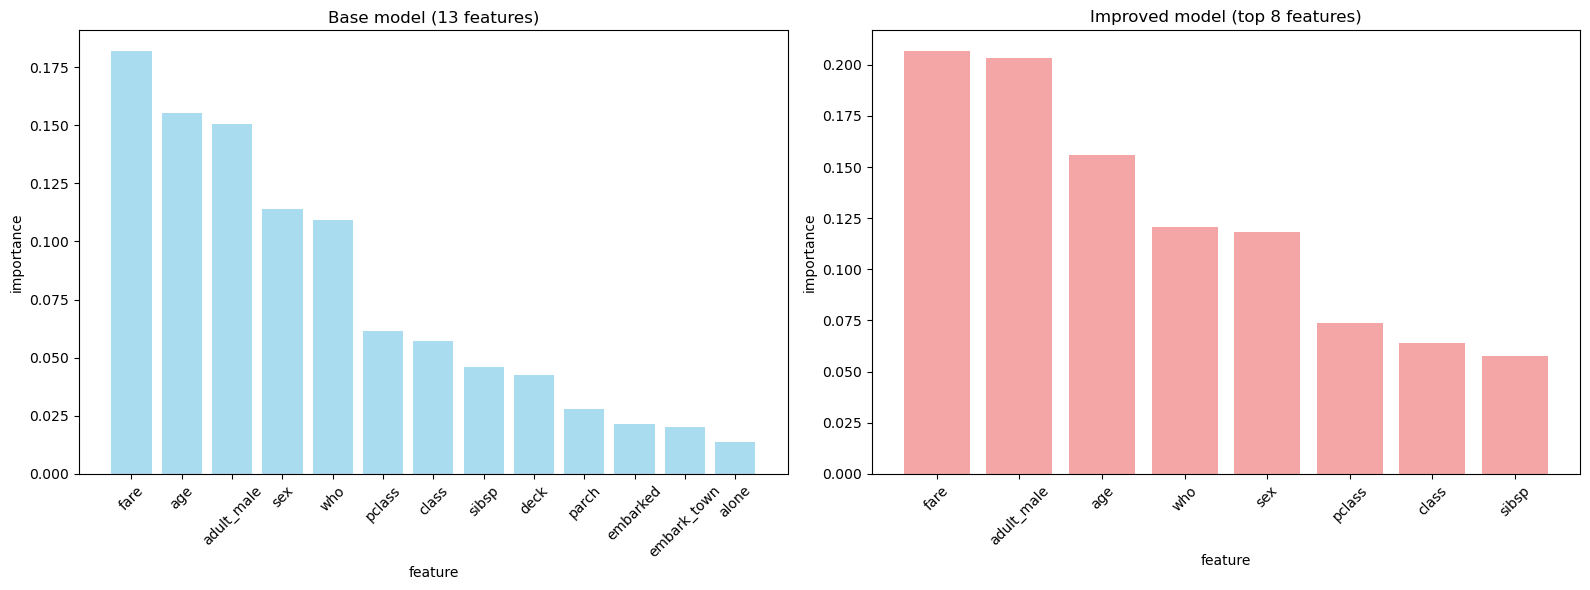


=== 특성 중요도 변화 분석 ===
fare: 0.1817 → 0.2065 (+0.0248)
age: 0.1550 → 0.1557 (+0.0007)
adult_male: 0.1504 → 0.2034 (+0.0530)
sex: 0.1140 → 0.1183 (+0.0043)
who: 0.1091 → 0.1205 (+0.0114)
pclass: 0.0613 → 0.0737 (+0.0124)
class: 0.0571 → 0.0641 (+0.0069)
sibsp: 0.0461 → 0.0579 (+0.0117)


In [137]:
# 개선된 모델의 특성 중요도 분석
feature_importance_improved = rf_improved.feature_importances_

# 개선된 모델의 특성 중요도 데이터프레임
importance_df_improved = pd.DataFrame({
    'feature': top_features,
    'importance': feature_importance_improved
}).sort_values('importance', ascending=False)

print("=== 개선된 모델 특성 중요도 ===")
print(importance_df_improved)

# 특성 중요도 시각화 비교
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 기존 모델 특성 중요도
top_orig = importance_df.head(13)
ax1.bar(top_orig['feature'], top_orig['importance'], color='skyblue', alpha=0.7)
ax1.set_title('Base model (13 features)')
ax1.set_xlabel('feature')
ax1.set_ylabel('importance')
ax1.tick_params(axis='x', rotation=45)

# 개선된 모델 특성 중요도 (상위 n개만)
ax2.bar(importance_df_improved['feature'], importance_df_improved['importance'], color='lightcoral', alpha=0.7)
ax2.set_title(f'Improved model (top {top_n_features} features)')
ax2.set_xlabel('feature')
ax2.set_ylabel('importance')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 특성 중요도 변화 분석
print("\n=== 특성 중요도 변화 분석 ===")
for i, feature in enumerate(top_features):
    orig_importance = importance_df[importance_df['feature'] == feature]['importance'].values[0]
    improved_importance = importance_df_improved[importance_df_improved['feature'] == feature]['importance'].values[0]
    change = improved_importance - orig_importance
    print(f"{feature}: {orig_importance:.4f} → {improved_importance:.4f} ({change:+.4f})")


In [138]:
# 모델 학습 시간 비교
import time

# 기존 모델 학습 시간 측정
start_time = time.time()
rf_model_time = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model_time.fit(X_train, y_train)
original_time = time.time() - start_time

# 개선된 모델 학습 시간 측정
start_time = time.time()
rf_improved_time = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=2)
rf_improved_time.fit(X_train_selected, y_train)
improved_time = time.time() - start_time

print("=== 모델 복잡도 및 효율성 비교 ===")
print(f"기존 모델 학습 시간: {original_time:.4f}초")
print(f"개선된 모델 학습 시간: {improved_time:.4f}초")
print(f"학습 시간 단축: {((original_time - improved_time) / original_time * 100):.1f}%")

print(f"\n기존 모델 특성 수: {X_train.shape[1]}개")
print(f"개선된 모델 특성 수: {X_train_selected.shape[1]}개")
print(f"모델 복잡도 감소: {((X_train.shape[1] - X_train_selected.shape[1]) / X_train.shape[1] * 100):.1f}%")

# 메모리 사용량 추정 (대략적)
original_memory = X_train.shape[1] * X_train.shape[0] * 8  # 8 bytes per float64
improved_memory = X_train_selected.shape[1] * X_train_selected.shape[0] * 8
print(f"\n메모리 사용량 추정:")
print(f"기존 모델: {original_memory / 1024:.1f} KB")
print(f"개선된 모델: {improved_memory / 1024:.1f} KB")
print(f"메모리 절약: {((original_memory - improved_memory) / original_memory * 100):.1f}%")


=== 모델 복잡도 및 효율성 비교 ===
기존 모델 학습 시간: 0.3016초
개선된 모델 학습 시간: 0.3062초
학습 시간 단축: -1.5%

기존 모델 특성 수: 13개
개선된 모델 특성 수: 8개
모델 복잡도 감소: 38.5%

메모리 사용량 추정:
기존 모델: 72.3 KB
개선된 모델: 44.5 KB
메모리 절약: 38.5%


In [141]:
# 개선된 모델 예측 예시 및 확률 비교, 간단히 비교해보는 예시이므로 정확하지 않습니다!
sample_indices = [0, 1, 2, 3, 4]
sample_X_selected = X_test_selected.iloc[sample_indices]
sample_y_true = y_test.iloc[sample_indices]

# 두 모델의 예측 비교
sample_y_pred_orig = rf_model.predict(X_test.iloc[sample_indices])
sample_y_pred_improved = rf_improved.predict(sample_X_selected)

# 두 모델의 예측 확률 비교
sample_proba_orig = rf_model.predict_proba(X_test.iloc[sample_indices])
sample_proba_improved = rf_improved.predict_proba(sample_X_selected)

print("=== 두 모델의 예측 비교 ===")
print(f"{'승객':<8} {'실제':<8} {'기존예측':<12} {'개선예측':<12} {'기존확률':<12} {'개선확률':<12}")
print("=" * 70)

for i, idx in enumerate(sample_indices):
    actual = "생존" if sample_y_true.iloc[i] == 1 else "사망"
    pred_orig = "생존" if sample_y_pred_orig[i] == 1 else "사망"
    pred_improved = "생존" if sample_y_pred_improved[i] == 1 else "사망"
    
    prob_orig = sample_proba_orig[i][1] * 100  # 생존 확률
    prob_improved = sample_proba_improved[i][1] * 100  # 생존 확률
    
    print(f"{idx+1:<8} {actual:<8} {pred_orig:<12} {pred_improved:<12} {prob_orig:<12.1f} {prob_improved:<12.1f}")

# 예측 일치도 분석
matches_orig = sum(sample_y_true.iloc[i] == sample_y_pred_orig[i] for i in range(len(sample_indices)))
matches_improved = sum(sample_y_true.iloc[i] == sample_y_pred_improved[i] for i in range(len(sample_indices)))

print(f"\n샘플 예측 정확도:")
print(f"기존 모델: {matches_orig}/{len(sample_indices)} ({matches_orig/len(sample_indices)*100:.1f}%)")
print(f"개선된 모델: {matches_improved}/{len(sample_indices)} ({matches_improved/len(sample_indices)*100:.1f}%)")


=== 두 모델의 예측 비교 ===
승객       실제       기존예측         개선예측         기존확률         개선확률        
1        생존       사망           사망           28.2         3.4         
2        사망       사망           사망           5.2          6.4         
3        사망       사망           사망           10.9         14.9        
4        생존       생존           생존           98.0         96.6        
5        생존       사망           사망           41.5         37.6        

샘플 예측 정확도:
기존 모델: 3/5 (60.0%)
개선된 모델: 3/5 (60.0%)


## 문제 2

이제 아래 markdown으로 모델 개선 결과를 종합 분석 내용을 적어주세요.

모델이 개선이 잘 안 되어도 좋으니 EDA, 시각화, 피처 엔지니어링까지 이어지는 흐름에서 얻은 인사이트를 적어주세요.

Ex, 전체 피쳐(13개)를 전부 넣는 것보다 영향력이 높은 상위 피쳐를 넣은 이유.
--> 좋아졌다면 왜 좋아졌는지, 나빠졌다면 왜 나빠졌는지

EX2, 피처중 높은 영향력을 보이는 피처가 왜 그렇게 나온 것일지
--> fare(요금) 지불은 부자들이 더 빠르게 탈출하여 살았을 수 있음을 암시... 등등

- 여성이 남성보다 생존률이 높게 나타났다.
  - 타이타닉 구조 당시 'Women and children first' 원칙 반영
- 1등석 승객이 3등석 승객보다 생존 확률이 현저히 높음
  - 구조 우선순위와 구조 위치 접근성 등 복합적인 요인
  - 사회적 계급 및 구조 접근성
- 나이가 많을수록 생존률이 낮아짐
  - 구조 시 활동성, 판단력 등의 영향
- 요금이 높을수록 생존률이 높음
  - 고가 요금은 고급 선실과 직결
- 상위 8개 특성만 선택
  - 제거된 요인들은 모델 성능에 크게 기여하지 않는다고 판단
  - 이로 인한 성능 및 메모리 효율성 증가
  - 개선된 모델은 실제 사망자를 더 정확히 예측
  - 예측은 동일했지만, 정밀도와 F1-score가 향상됨

아래는 보너스로 하이퍼파라미터 튜닝도 해보실 수 있습니다

괜찮으시면 한번 해보시는 것도 좋아보입니다.

In [149]:
# 보너스: 하이퍼파라미터 튜닝을 통한 추가 개선
from sklearn.model_selection import GridSearchCV

print("=== 하이퍼파라미터 튜닝 시작 ===")
print("주의: 시간이 다소 소요될 수 있습니다...")

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [8, 10, 12, 14],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=7,  # 5-fold 교차검증
    scoring='accuracy',
    n_jobs=-1,  # 모든 CPU 코어 사용
    verbose=1
)

# 하이퍼파라미터 튜닝 실행
grid_search.fit(X_train_selected, y_train)

print(f"\n=== 최적 하이퍼파라미터 ===")
print(f"최적 파라미터: {grid_search.best_params_}")
print(f"교차검증 최고 점수: {grid_search.best_score_:.4f}")

# 최적 모델로 예측
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_selected)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"\n=== 최종 모델 성능 비교 ===")
print(f"기존 모델 정확도: {accuracy:.4f}")
print(f"개선된 모델 정확도: {accuracy_improved:.4f}")
print(f"최적 튜닝 모델 정확도: {accuracy_best:.4f}")
print(f"최종 성능 향상: {((accuracy_best - accuracy) * 100):+.2f}%p")


=== 하이퍼파라미터 튜닝 시작 ===
주의: 시간이 다소 소요될 수 있습니다...
Fitting 7 folds for each of 144 candidates, totalling 1008 fits

=== 최적 하이퍼파라미터 ===
최적 파라미터: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
교차검증 최고 점수: 0.8371

=== 최종 모델 성능 비교 ===
기존 모델 정확도: 0.8268
개선된 모델 정확도: 0.8324
최적 튜닝 모델 정확도: 0.8212
최종 성능 향상: -0.56%p


C:\Users\kyung\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


고생하셨습니다